## Importing Useful Libraries

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew

## EXPLORING DATA

In [71]:
# Loading Datasets
df2 = pd.read_csv('credit_record.csv')
df1 = pd.read_csv('application_record.csv')

In [72]:
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [73]:
df1.nunique()
# We got some of the duplicates ID which needs to be removed

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [74]:
# Removing Duplicates ID
df1.drop_duplicates(subset = ['ID'], inplace = True)

In [75]:
# "FLAG_MOBIl" has constant category so it doesn't helps for prediction
df1.drop(['FLAG_MOBIL'],axis = 1,inplace = True)

In [76]:
# Viewing Dataset
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0


In [77]:
 # finding missing values(nan type)
df1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [78]:
df1['OCCUPATION_TYPE'].unique()
len(df1['OCCUPATION_TYPE'].unique())

19

## PLOTS

Text(0, 0.5, 'count')

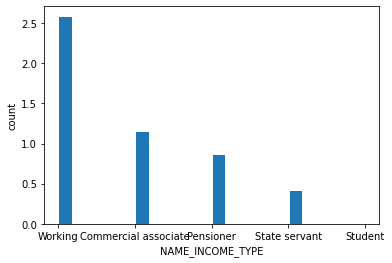

In [79]:
# Histogram Plotting For Different Features
plt.hist(df1.NAME_INCOME_TYPE,bins=20,rwidth=0.8,density =True)
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('count')

Text(0, 0.5, 'count')

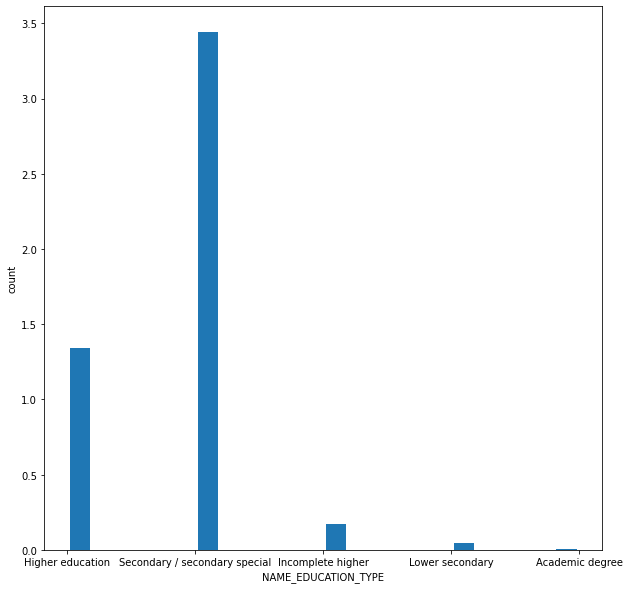

In [80]:
plt.figure(figsize=(10,10))
plt.hist(df1.NAME_EDUCATION_TYPE,bins=20,rwidth=0.8,density =True)
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('count')

Text(0, 0.5, 'count')

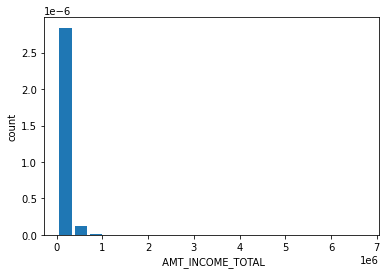

In [81]:
plt.hist(df1. AMT_INCOME_TOTAL,bins=20,rwidth=0.8,density =True)
plt.xlabel(' AMT_INCOME_TOTAL')
plt.ylabel('count')

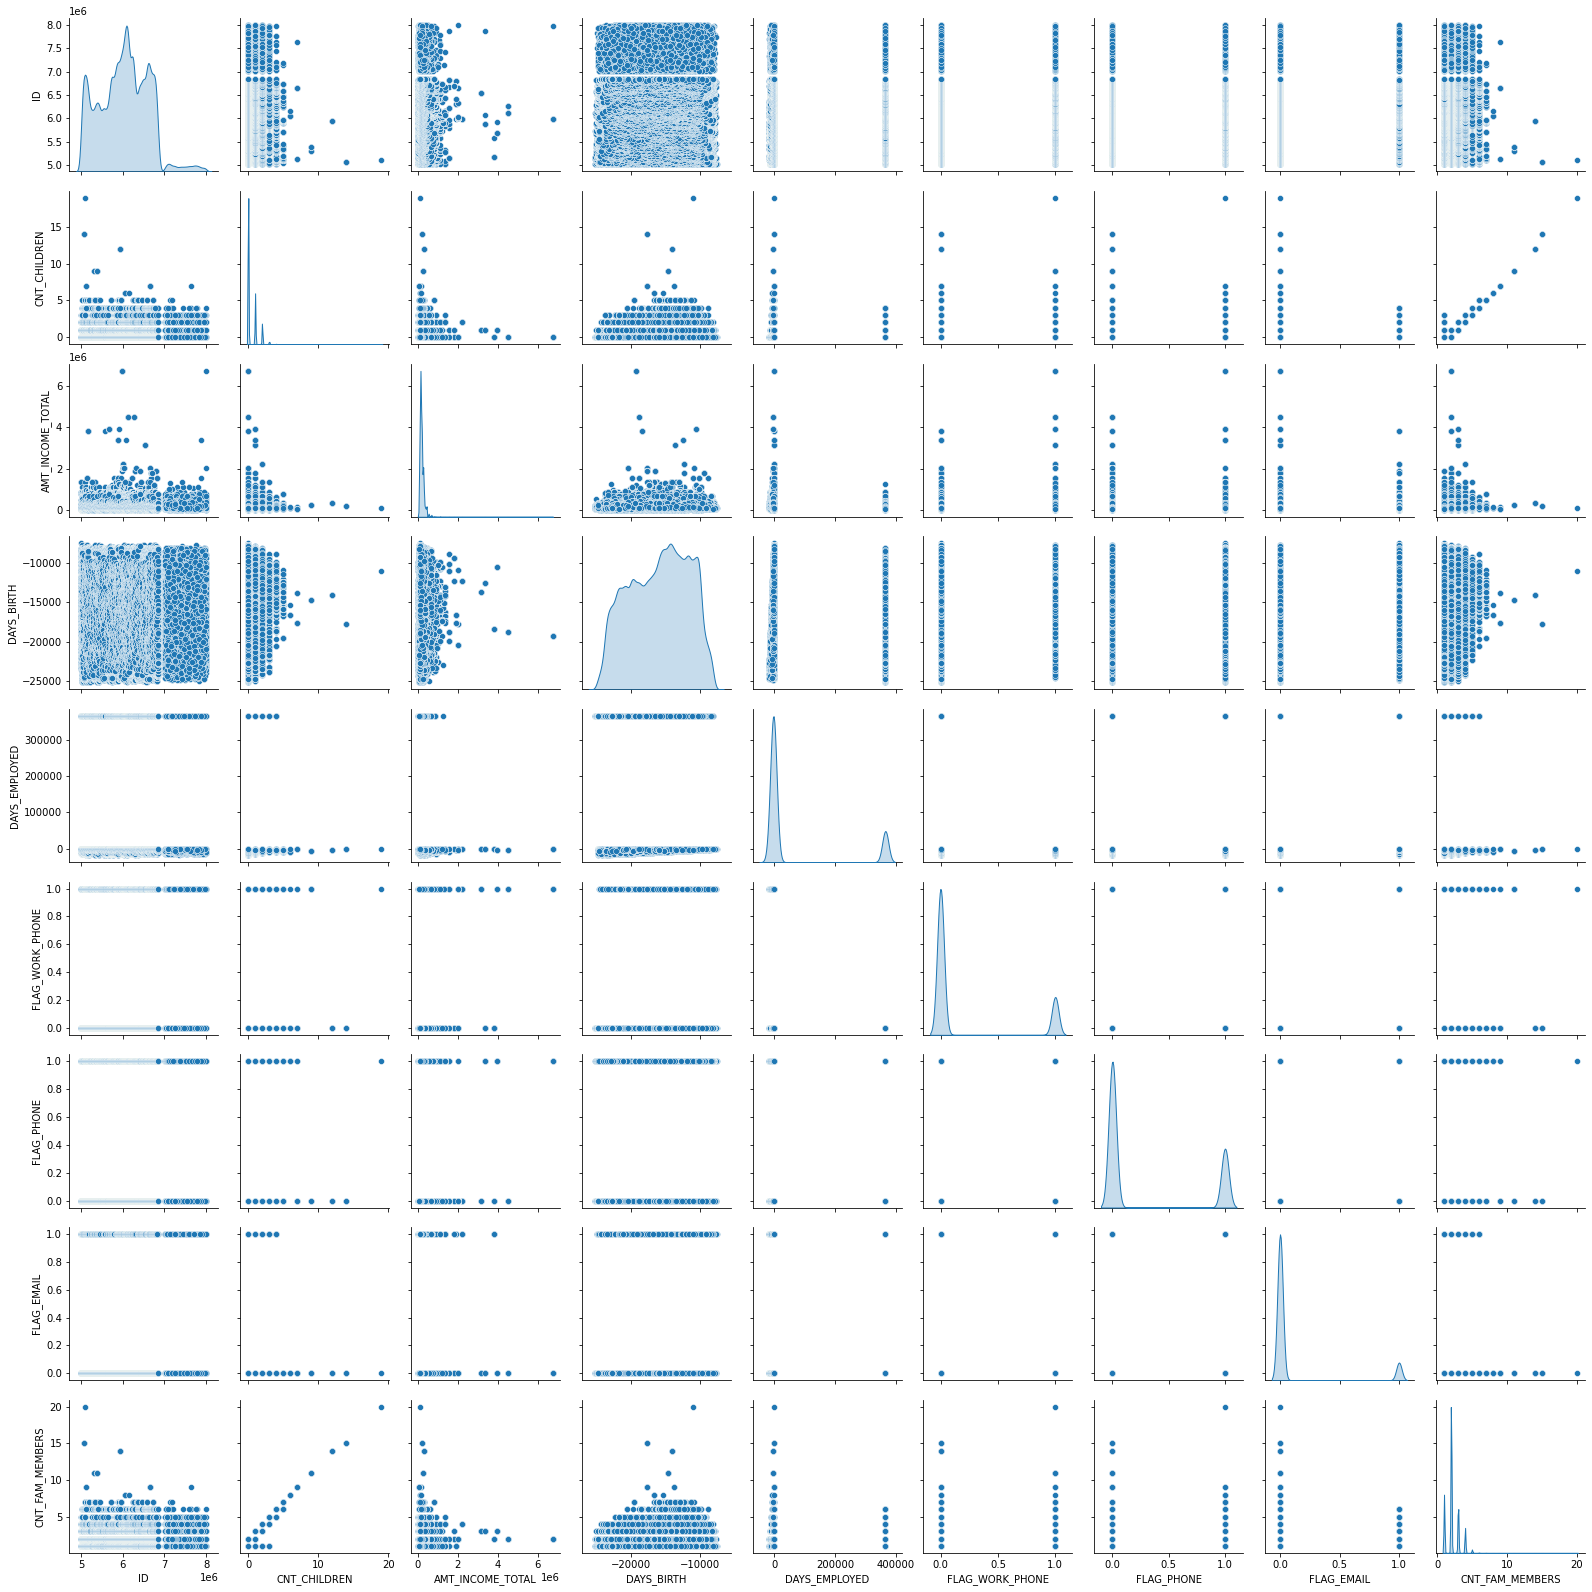

In [82]:
# Pair Plots
sns.pairplot(df1,diag_kind = 'kde',kind = 'scatter',palette = 'husl')

## DATA ENCODING

In [83]:
# Encoding Categorical Data
encoder = OrdinalEncoder()
cat_cols = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
           'OCCUPATION_TYPE']
def encode(data):
    nonulls = np.array(data.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal=encoder.fit_transform(impute_reshape)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data
## Applying On dataset
for coloumns in cat_cols:
    encode(df1[coloumns])

C:\Users\Kumar Aman\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Kumar Aman\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Kumar Aman\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [84]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,NaN,2.0
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,NaN,2.0
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,-1134,0,0,0,16.0,2.0
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0


In [85]:
# Filling Missing Value With mode
df1.fillna(df1['OCCUPATION_TYPE'].mode()[0],inplace = True)

In [86]:
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,-1134,0,0,0,16.0,2.0
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1.0,0.0,1.0,0,135000.0,1.0,4.0,2.0,1.0,-22717,365243,0,0,0,8.0,1.0
438553,6840222,0.0,0.0,0.0,0,103500.0,4.0,4.0,3.0,1.0,-15939,-3007,0,0,0,8.0,1.0
438554,6841878,0.0,0.0,0.0,0,54000.0,0.0,1.0,3.0,5.0,-8169,-372,1,0,0,14.0,1.0
438555,6842765,0.0,0.0,1.0,0,72000.0,1.0,4.0,1.0,1.0,-21673,365243,0,0,0,8.0,2.0


In [87]:
# Credit Record Dataset
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [89]:
df2.nunique()
#But we Only require number of Unique ID

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [90]:
# Removing Duplicates If any
df2[['ID','MONTHS_BALANCE']].drop_duplicates().shape[0]

1048575

In [91]:
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [92]:
df2.isnull().sum()
# No Missing Values

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [93]:
# Number of unique Features on STATUS
df2['STATUS'].nunique()


8

In [94]:
# Mapping Status to boolean "goodDebt" vs. "badDebt"
# I'm Assuming debt over 2 months to be bad debt for getting Credit Card
# Dictionary Mapping 8 differnt features to 2
status_dict={
    'X':'goodDebt',
    'C':'goodDebt',
    '0':'goodDebt',
    '1':'goodDebt',
    '2':'badDebt',
    '3':'badDebt',
    '4':'badDebt',
    '5':'badDebt'   
}
df2.replace({'STATUS':status_dict},inplace = True)
df2.head(15)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,goodDebt
1,5001711,-1,goodDebt
2,5001711,-2,goodDebt
3,5001711,-3,goodDebt
4,5001712,0,goodDebt
5,5001712,-1,goodDebt
6,5001712,-2,goodDebt
7,5001712,-3,goodDebt
8,5001712,-4,goodDebt
9,5001712,-5,goodDebt


In [95]:
 print(df2['ID'].value_counts()[5001712])
# We do not require 'MONTHS_BALANCE' now , transforming df2 to have ID STATUS COLOUMN
df2 = df2.value_counts(subset=['ID','STATUS']).unstack(fill_value=0)
df2

19


STATUS,badDebt,goodDebt
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


In [96]:
# Conditioning for Credit Card Approval
df2.loc[(df2['goodDebt']>df2['badDebt']),'Approval_Position']=1
df2.loc[(df2['goodDebt']<=df2['badDebt']),'Approval_Position']=0

In [97]:
df2

STATUS,badDebt,goodDebt,Approval_Position
ID,,,
5001711,0,4,1.0
5001712,0,19,1.0
5001713,0,22,1.0
5001714,0,15,1.0
5001715,0,60,1.0
...,...,...,...
5150482,0,18,1.0
5150483,0,18,1.0
5150484,0,13,1.0


In [98]:
# Dropping badDebt And goodDebt , their info have been merged with Approval_Position
df2.drop(['badDebt','goodDebt'],axis=1,inplace=True)
df2

STATUS,Approval_Position
ID,
5001711,1.0
5001712,1.0
5001713,1.0
5001714,1.0
5001715,1.0
...,...
5150482,1.0
5150483,1.0
5150484,1.0


In [99]:
# Counting number of people for credit card holdability
df2['Approval_Position'].value_counts()

1.0    45931
0.0       54
Name: Approval_Position, dtype: int64

In [100]:
# Merging Datasets
df=df1.merge(df2,on='ID')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0,1.0
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0,1.0
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,-1134,0,0,0,16.0,2.0,1.0
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0,1.0
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,-17348,-2420,0,0,0,10.0,2.0,1.0
36453,5149834,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,-12387,-1325,0,1,1,11.0,2.0,1.0
36454,5149838,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,-12387,-1325,0,1,1,11.0,2.0,1.0
36455,5150049,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,-17958,-655,0,0,0,14.0,2.0,1.0


## SUB PLOTS

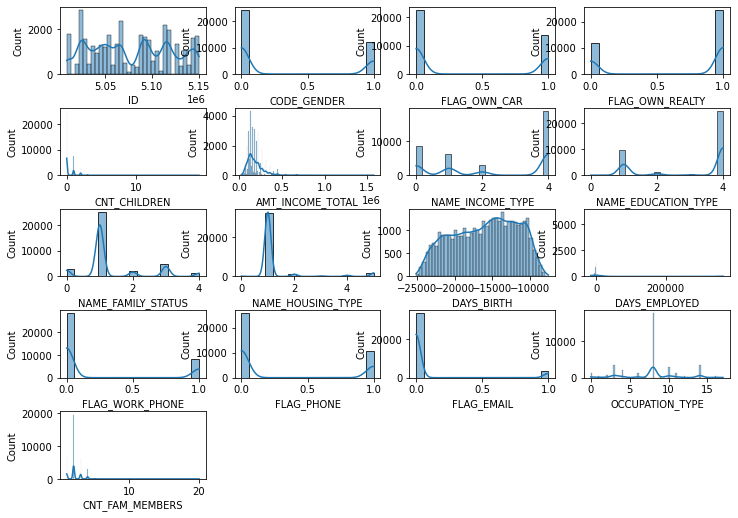

In [101]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.drop("Approval_Position", axis=1).columns:
    plt.subplot(10,4, i)
    sns.histplot(data=df, x=col_name, kde=True,  multiple='layer', alpha=0.5, palette='viridis')
    i += 1

## BOX PLOTS

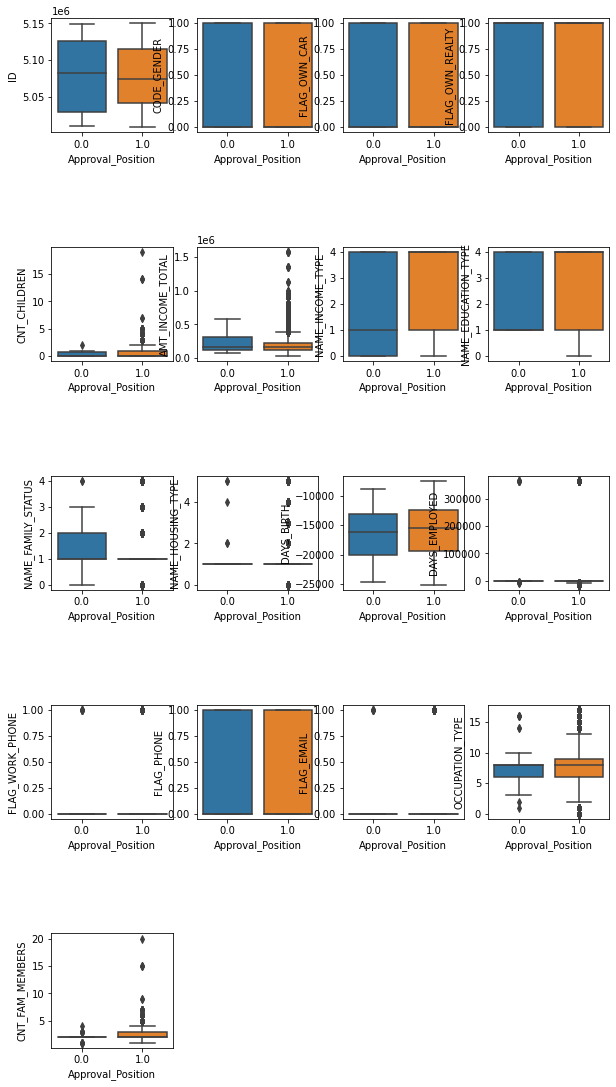

In [102]:
plt.figure(figsize=(10,40))
plt.subplots_adjust(hspace=1)
i=1
for col_name in df.drop(columns=["Approval_Position"],axis=1).columns:
    plt.subplot(10,4, i)
    sns.boxplot(data=df, x='Approval_Position', y=col_name)
    i+=1

## OUTLIERS

In [103]:
# we are visualizing Outliers in 'Annual Income ' , 'Family member count' ,'Days employed'
df.AMT_INCOME_TOTAL.describe()

count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

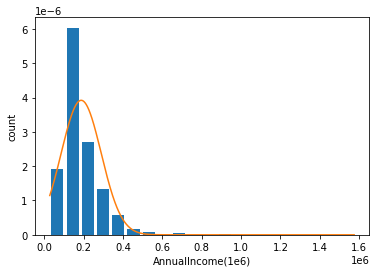

In [104]:
from scipy.stats import norm
plt.hist(df.AMT_INCOME_TOTAL,bins=20,rwidth=0.8,density =True)
plt.xlabel('AnnualIncome(1e6)')
plt.ylabel('count')

rng=np.arange(df.AMT_INCOME_TOTAL.min(),df.AMT_INCOME_TOTAL.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.AMT_INCOME_TOTAL.mean(),df.AMT_INCOME_TOTAL.std()))

In [105]:
# Calculating Z Scores for Annual Income
df['zscore_amt']=(df.AMT_INCOME_TOTAL -df.AMT_INCOME_TOTAL.mean())/df.AMT_INCOME_TOTAL.std()
df_no_outliers = df[(df.zscore_amt>-3) & (df.zscore_amt<3)]
df_no_outliers

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position,zscore_amt
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0,1.0,2.365813
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0,1.0,2.365813
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,-1134,0,0,0,16.0,2.0,1.0,-0.728817
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0,1.0,0.818498
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0,1.0,0.818498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,-17348,-2420,0,0,0,10.0,2.0,1.0,1.260588
36453,5149834,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,-12387,-1325,0,1,1,11.0,2.0,1.0,-0.286727
36454,5149838,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,-12387,-1325,0,1,1,11.0,2.0,1.0,-0.286727
36455,5150049,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,-17958,-655,0,0,0,14.0,2.0,1.0,0.951125


In [106]:
# Calculating Z Scores for Family Member Count
df_no_outliers['zscore_cnt']=(df_no_outliers.CNT_FAM_MEMBERS -df_no_outliers.CNT_FAM_MEMBERS.mean())/df_no_outliers.CNT_FAM_MEMBERS.std()
df_no_outliers = df_no_outliers[(df_no_outliers.zscore_cnt>-3) & (df_no_outliers.zscore_cnt<3)]
df_no_outliers

C:\Users\KUMARA~1\AppData\Local\Temp/ipykernel_16268/2281511418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['zscore_cnt']=(df_no_outliers.CNT_FAM_MEMBERS -df_no_outliers.CNT_FAM_MEMBERS.mean())/df_no_outliers.CNT_FAM_MEMBERS.std()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position,zscore_amt,zscore_cnt
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0,1.0,2.365813,-0.216061
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,0,0,8.0,2.0,1.0,2.365813,-0.216061
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,-1134,0,0,0,16.0,2.0,1.0,-0.728817,-0.216061
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0,1.0,0.818498,-1.313125
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,0,1,1,14.0,1.0,1.0,0.818498,-1.313125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,-17348,-2420,0,0,0,10.0,2.0,1.0,1.260588,-0.216061
36453,5149834,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,-12387,-1325,0,1,1,11.0,2.0,1.0,-0.286727,-0.216061
36454,5149838,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,-12387,-1325,0,1,1,11.0,2.0,1.0,-0.286727,-0.216061
36455,5150049,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,-17958,-655,0,0,0,14.0,2.0,1.0,0.951125,-0.216061


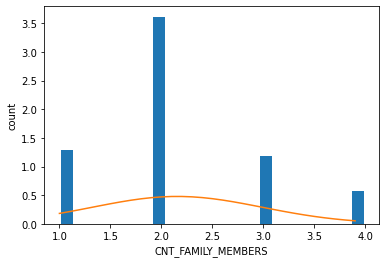

In [107]:
# For cnt family members
plt.hist(df_no_outliers.CNT_FAM_MEMBERS,bins=20,rwidth=0.8,density =True)
plt.xlabel('CNT_FAMILY_MEMBERS')
plt.ylabel('count')

rng=np.arange(df_no_outliers.CNT_FAM_MEMBERS.min(),df_no_outliers.CNT_FAM_MEMBERS.max(),0.1)
plt.plot(rng,norm.pdf(rng,df_no_outliers.CNT_FAM_MEMBERS.mean(),df_no_outliers.CNT_FAM_MEMBERS.std()))

In [108]:
# Calculating Z Scores for Days Employed
df_no_outliers['zscore_emp']=(df_no_outliers.DAYS_EMPLOYED - df_no_outliers.DAYS_EMPLOYED.mean())/df_no_outliers.DAYS_EMPLOYED.std()
df_no_outliers = df_no_outliers[(df_no_outliers.zscore_emp>-3) & (df_no_outliers.zscore_emp<3)]
df_no_outliers.head()

C:\Users\KUMARA~1\AppData\Local\Temp/ipykernel_16268/2403136547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['zscore_emp']=(df_no_outliers.DAYS_EMPLOYED - df_no_outliers.DAYS_EMPLOYED.mean())/df_no_outliers.DAYS_EMPLOYED.std()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position,zscore_amt,zscore_cnt,zscore_emp
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,...,-4542,1,0,0,8.0,2.0,1.0,2.365813,-0.216061,-0.469206
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,...,-4542,1,0,0,8.0,2.0,1.0,2.365813,-0.216061,-0.469206
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,...,-1134,0,0,0,16.0,2.0,1.0,-0.728817,-0.216061,-0.444656
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,...,-3051,0,1,1,14.0,1.0,1.0,0.818498,-1.313125,-0.458465
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,...,-3051,0,1,1,14.0,1.0,1.0,0.818498,-1.313125,-0.458465


In [109]:
# Transforming employed days into years and also making it positive
df_no_outliers['DAYS_EMPLOYED'] = df_no_outliers.DAYS_EMPLOYED/-365
df_no_outliers

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position,zscore_amt,zscore_cnt,zscore_emp
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,...,12.443836,1,0,0,8.0,2.0,1.0,2.365813,-0.216061,-0.469206
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,...,12.443836,1,0,0,8.0,2.0,1.0,2.365813,-0.216061,-0.469206
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,...,3.106849,0,0,0,16.0,2.0,1.0,-0.728817,-0.216061,-0.444656
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,...,8.358904,0,1,1,14.0,1.0,1.0,0.818498,-1.313125,-0.458465
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,...,8.358904,0,1,1,14.0,1.0,1.0,0.818498,-1.313125,-0.458465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,...,6.630137,0,0,0,10.0,2.0,1.0,1.260588,-0.216061,-0.453919
36453,5149834,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,...,3.630137,0,1,1,11.0,2.0,1.0,-0.286727,-0.216061,-0.446031
36454,5149838,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,...,3.630137,0,1,1,11.0,2.0,1.0,-0.286727,-0.216061,-0.446031
36455,5150049,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,...,1.794521,0,0,0,14.0,2.0,1.0,0.951125,-0.216061,-0.441205


In [110]:
df_no_outliers.drop(['zscore_amt','zscore_cnt','zscore_emp'],axis = 1,inplace = True)

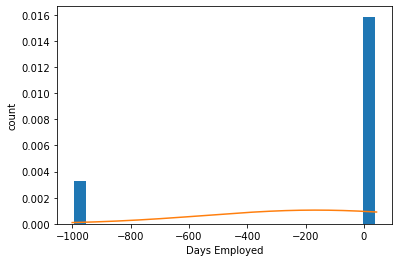

In [111]:
# For days employed
plt.hist(df_no_outliers.DAYS_EMPLOYED,bins=20,rwidth=0.8,density =True)
plt.xlabel('Days Employed')
plt.ylabel('count')

rng=np.arange(df_no_outliers.DAYS_EMPLOYED.min(),df_no_outliers.DAYS_EMPLOYED.max(),0.1)
plt.plot(rng,norm.pdf(rng,df_no_outliers.DAYS_EMPLOYED.mean(),df_no_outliers.DAYS_EMPLOYED.std()))

In [112]:
#  final data set after removing outliers
df_no_outliers

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,12.443836,1,0,0,8.0,2.0,1.0
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,12.443836,1,0,0,8.0,2.0,1.0
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,3.106849,0,0,0,16.0,2.0,1.0
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,8.358904,0,1,1,14.0,1.0,1.0
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,8.358904,0,1,1,14.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,-17348,6.630137,0,0,0,10.0,2.0,1.0
36453,5149834,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,-12387,3.630137,0,1,1,11.0,2.0,1.0
36454,5149838,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,-12387,3.630137,0,1,1,11.0,2.0,1.0
36455,5150049,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,-17958,1.794521,0,0,0,14.0,2.0,1.0


## SKEWNESS

ID
0.08559281721051237


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


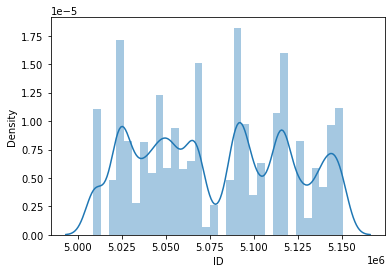

CODE_GENDER
0.7387423620306471


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


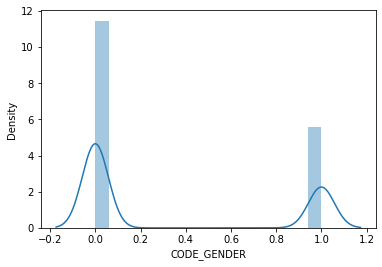

FLAG_OWN_CAR
0.5180443779582121


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


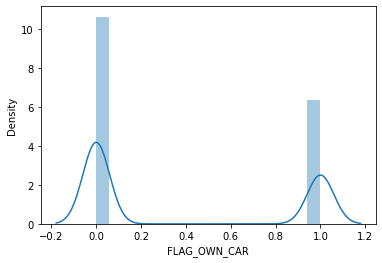

FLAG_OWN_REALTY
-0.7209222387828852


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


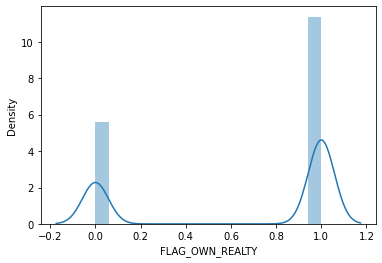

CNT_CHILDREN
1.4395599760811948


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


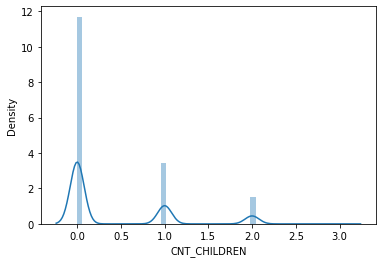

AMT_INCOME_TOTAL
0.9925953479009613


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


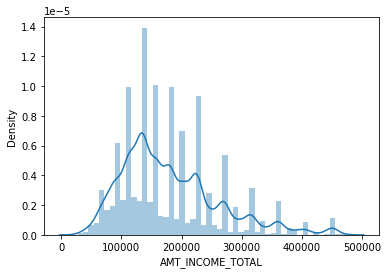

NAME_INCOME_TYPE
-0.2965726094681318


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


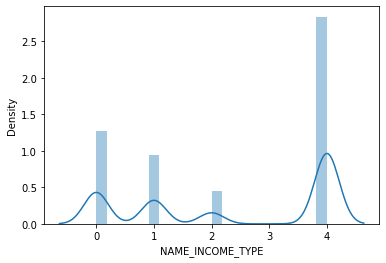

NAME_EDUCATION_TYPE
-0.8793989080867333


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


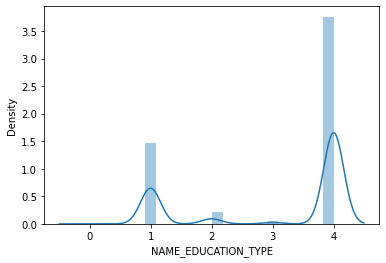

NAME_FAMILY_STATUS
1.2680668898872192


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


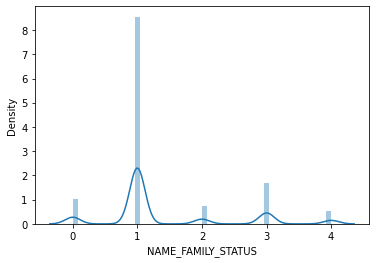

NAME_HOUSING_TYPE
3.278767597276493


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


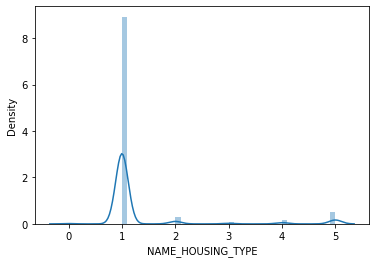

DAYS_BIRTH
-0.16827103894950202


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


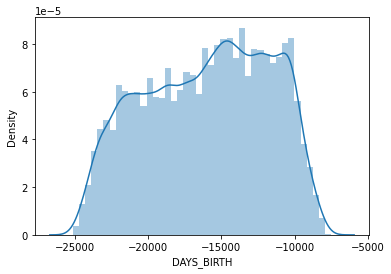

DAYS_EMPLOYED
-1.73833911379632


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


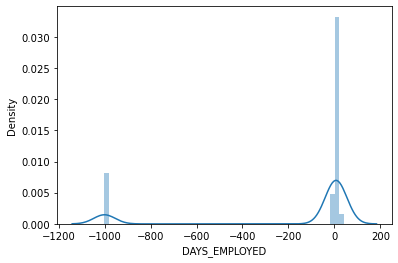

FLAG_WORK_PHONE
1.3149292949418898


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


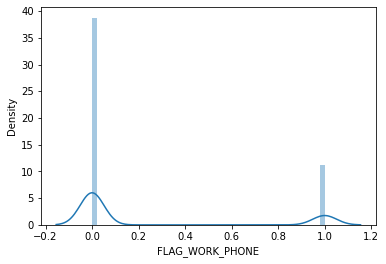

FLAG_PHONE
0.9067315922371121


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


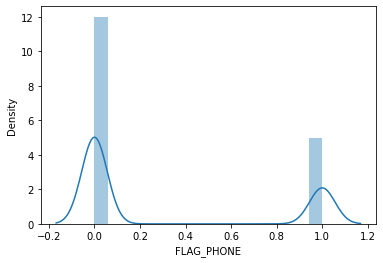

FLAG_EMAIL
2.9039008791307643


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


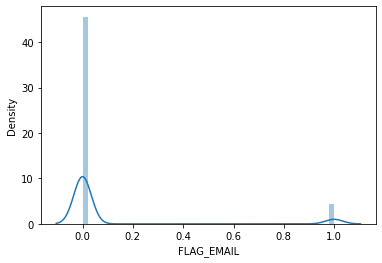

OCCUPATION_TYPE
0.033866854003854675


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


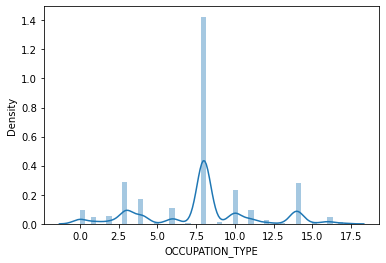

CNT_FAM_MEMBERS
0.6009669509511704


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


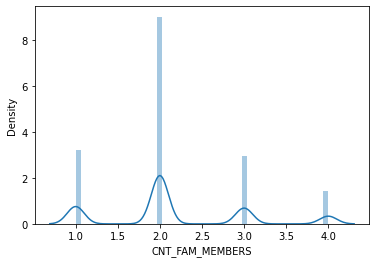

Approval_Position
-27.41682289918705


C:\Users\Kumar Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


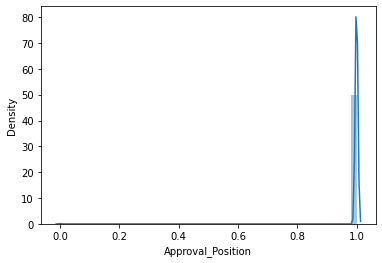

In [113]:
# Using library "from scipy.stats import skew" and plotting
for col in df_no_outliers:
    print(col)
    print(skew(df_no_outliers[col]))
    plt.figure()
    sns.distplot(df_no_outliers[col])
    plt.show()

In [114]:
# Finalizing dataframe ('Removing ID , Email , Birthdays because they are of no use')
df_final = df_no_outliers.drop(['ID','FLAG_EMAIL','DAYS_BIRTH'],axis = 1)

## HEATMAPS

<AxesSubplot:>

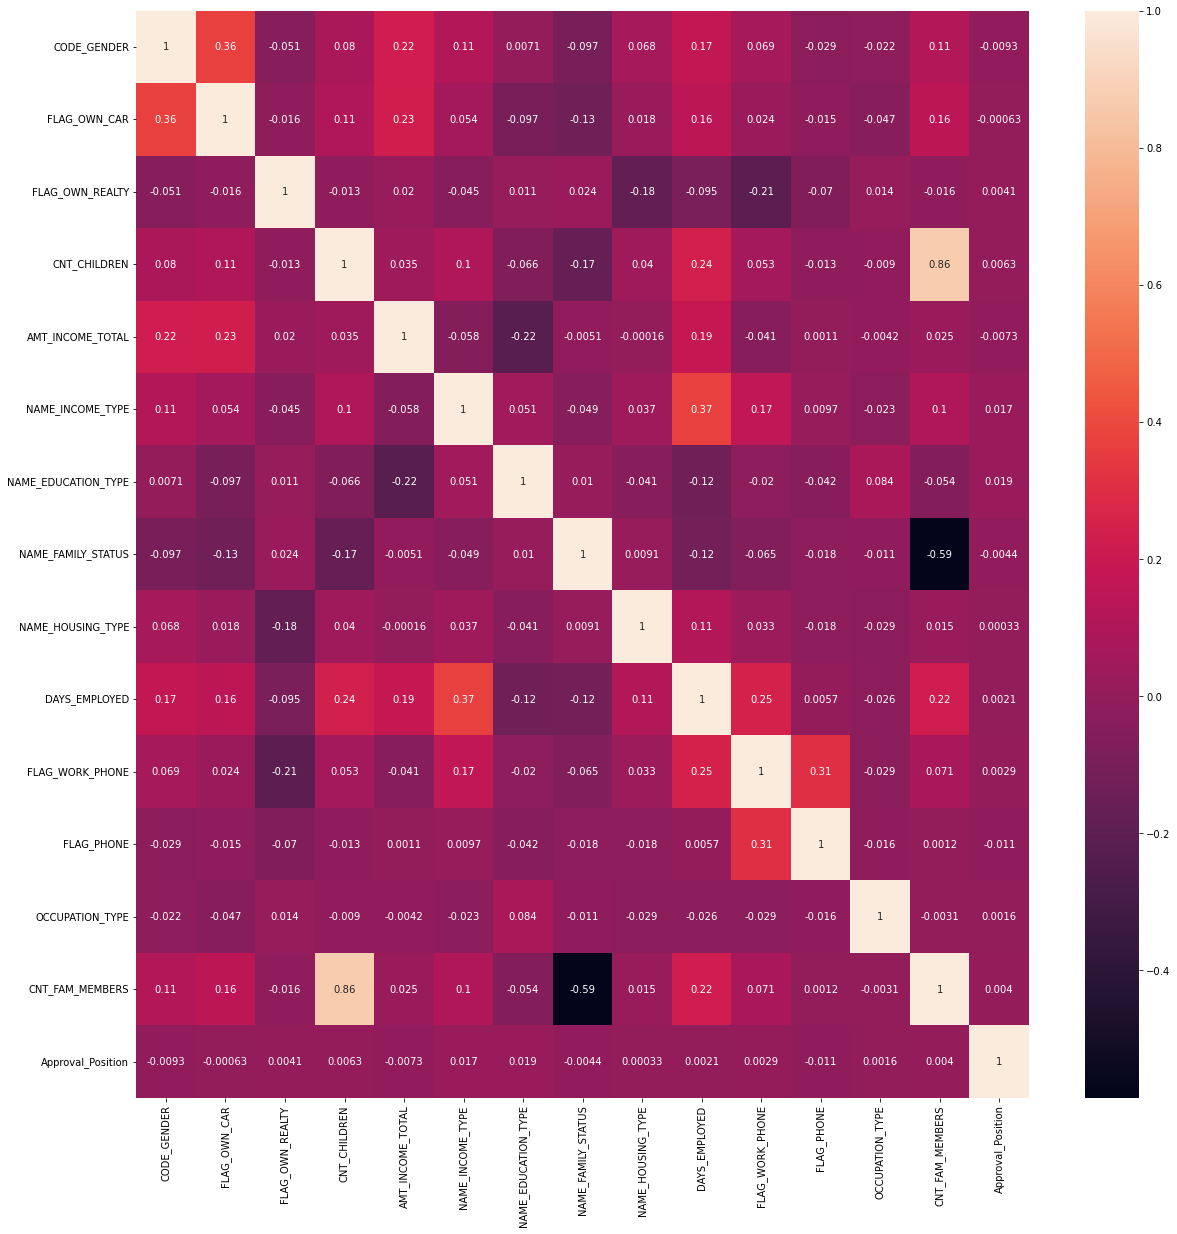

In [115]:
# Heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(df_final.corr(), annot=True)

## FEATURE SELECTION

### ANNOVA OR F-SCORE FEATURE SELECTION TEST

In [116]:
df_final

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approval_Position
0,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,12.443836,1,0,8.0,2.0,1.0
1,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,12.443836,1,0,8.0,2.0,1.0
2,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,3.106849,0,0,16.0,2.0,1.0
3,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,8.358904,0,1,14.0,1.0,1.0
4,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,8.358904,0,1,14.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,6.630137,0,0,10.0,2.0,1.0
36453,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,3.630137,0,1,11.0,2.0,1.0
36454,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,3.630137,0,1,11.0,2.0,1.0
36455,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,1.794521,0,0,14.0,2.0,1.0


In [117]:
# importing modules for anova selection
from sklearn.feature_selection import f_classif,SelectKBest
fs = SelectKBest(score_func=f_classif,k='all')
#feature matrix
X = df_final.drop(columns = ["Approval_Position"], axis = 1) 
#target
y = df_final["Approval_Position"] 

In [118]:
fs.fit(X,y)

SelectKBest(k='all')

In [119]:
features  = X.columns
features

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

### Printing f scores for all features

In [120]:
# f scores
for i in range(len(features)):
    print(f"{features[i]}:          {float(fs.scores_[i])}") 

CODE_GENDER:          3.0834810930764256
FLAG_OWN_CAR:          0.01401268576406552
FLAG_OWN_REALTY:          0.5869365451674536
CNT_CHILDREN:          1.4280424851319342
AMT_INCOME_TOTAL:          1.8777032860721716
NAME_INCOME_TYPE:          10.130253362634333
NAME_EDUCATION_TYPE:          12.304503170082437
NAME_FAMILY_STATUS:          0.6979949127159802
NAME_HOUSING_TYPE:          0.003947376061044794
DAYS_EMPLOYED:          0.15463811903948943
FLAG_WORK_PHONE:          0.3085194056112992
FLAG_PHONE:          3.9537465942709904
OCCUPATION_TYPE:          0.0938875189412037
CNT_FAM_MEMBERS:          0.5729348818545109


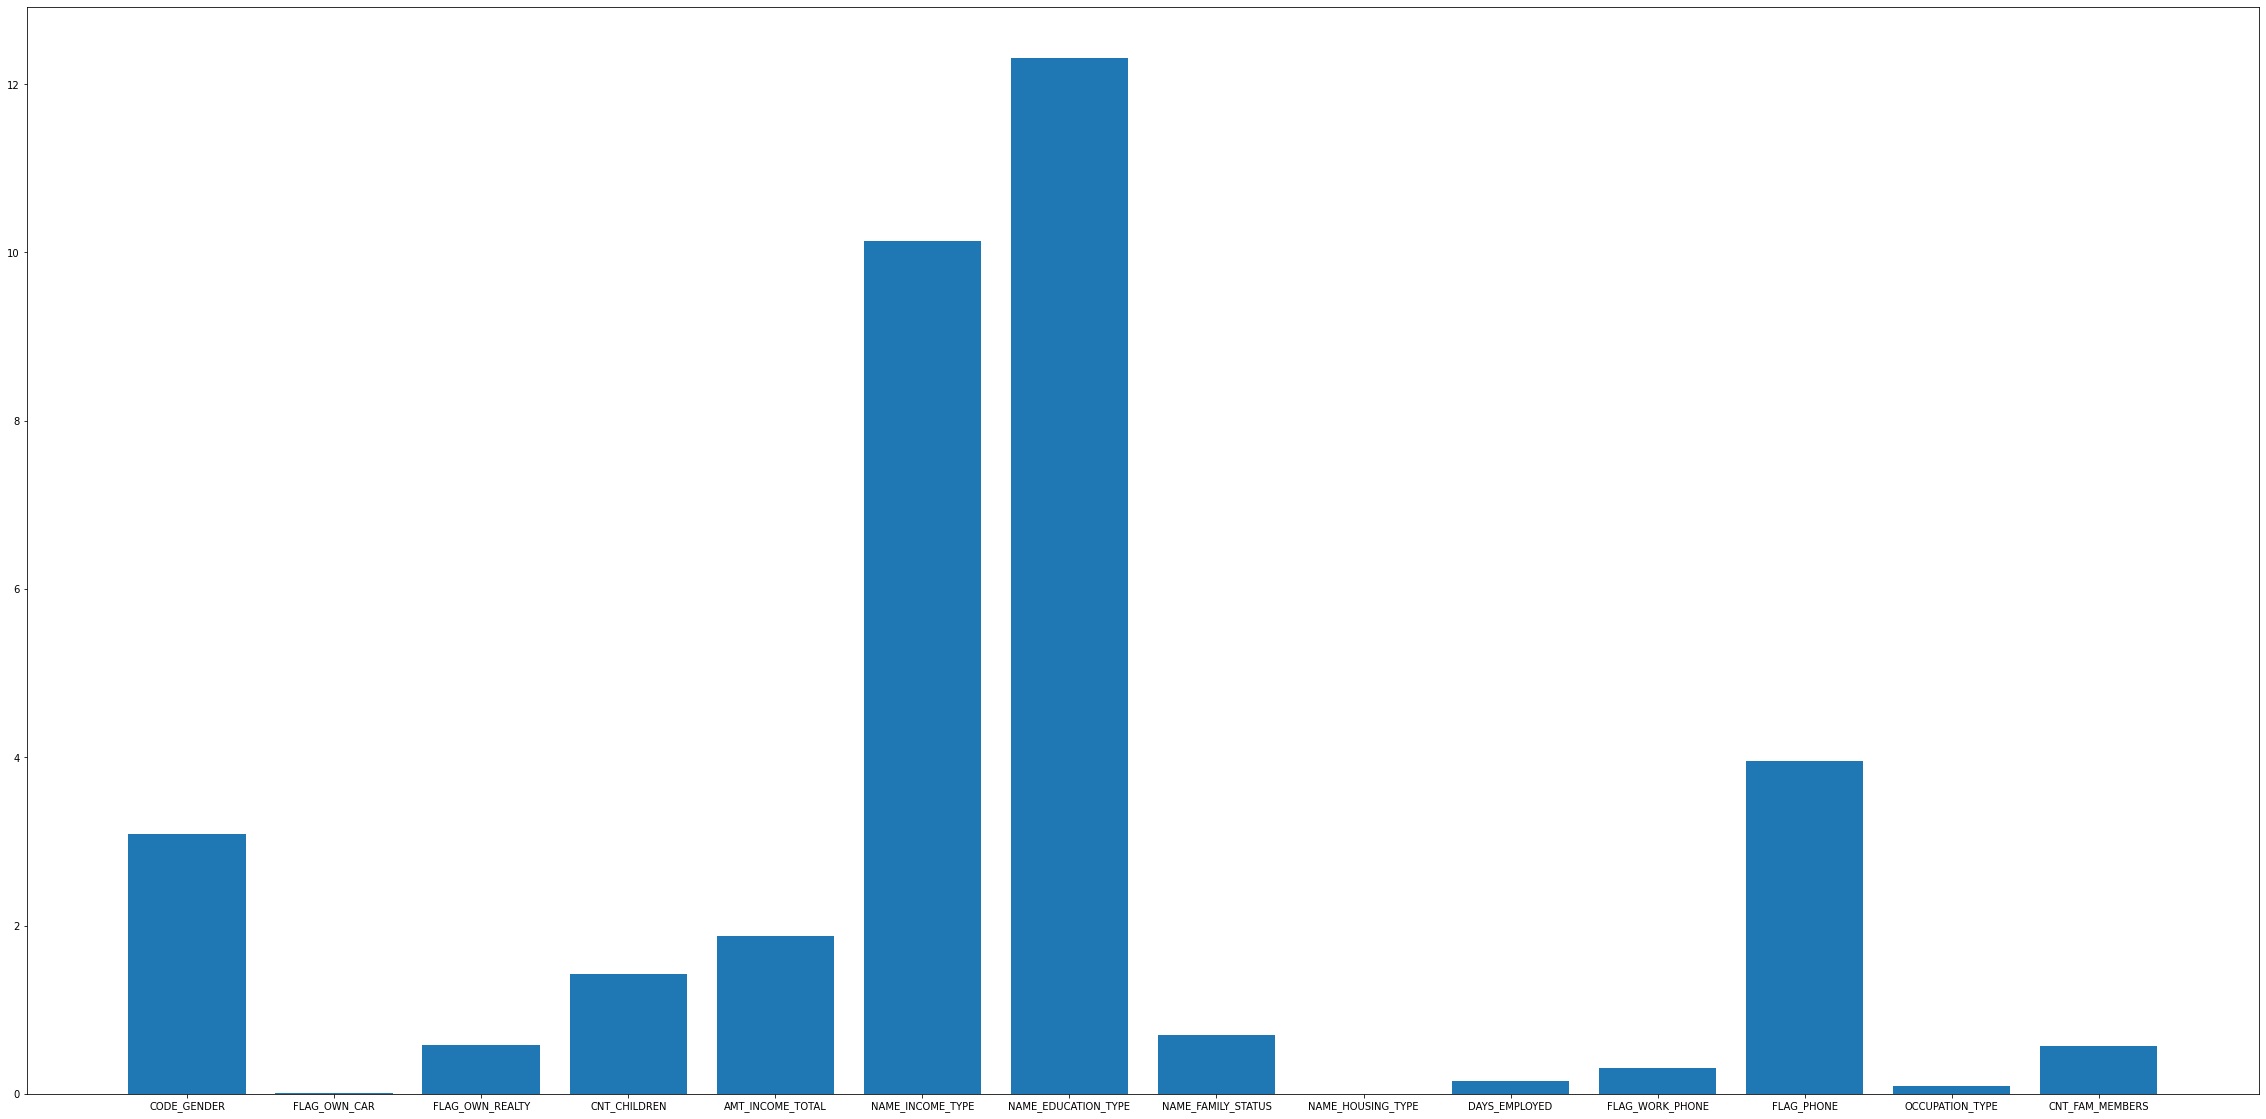

In [121]:
# plotting f scores of different features
plt.figure(figsize=(40,20))
plt.bar([i for i in features], fs.scores_)
plt.show()

In [122]:
# making list of useful features for predicting
predicting_fts = ['CODE_GENDER','AMT_INCOME_TOTAL','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FLAG_PHONE']

## MODELLING

### TRAIN TEST SPLIT

In [123]:
# importing modules
from sklearn.model_selection import train_test_split
X = df_final[predicting_fts]
y = df_final['Approval_Position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle=True)

### STANDARDIZATION

In [124]:
# importing libraries
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

# Standard Scalar 
sscaler = StandardScaler()
X_train_ss = sscaler.fit_transform(X_train)
X_test_ss = sscaler.transform(X_test)

# Quantile Transformer 
qscaler = QuantileTransformer(n_quantiles=100, random_state=43, output_distribution='normal')
X_train_qf = qscaler.fit_transform(X_train)
X_test_qf = qscaler.transform(X_test)

# Robust Scalar
rscaler = RobustScaler(with_scaling=True)
X_train_rs = rscaler.fit_transform(X_train)
X_test_rs = rscaler.transform(X_test)

In [125]:
# importing modules
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# metric 
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
# different model score by variable name with different types of standardisation

models = []
models.append(('Logistic Regression', LogisticRegression(random_state=53)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K Nearest Neighbour', KNeighborsClassifier()))
models.append(('Decision Tree', tree.DecisionTreeClassifier(random_state=53)))
models.append(('Random Forest', RandomForestClassifier(random_state=53)))
models.append(('SVC', SVC(probability=True, random_state= 53)))


# empty data frame
model_name = []
ss_score = []
qt_score = []
rs_score = []

for name, model in models:
    model_name.append(name)
    cv = cross_val_score(model, X_train_ss, y_train, cv = 5, scoring= "accuracy")
    ss_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_qf, y_train, cv = 5, scoring= "accuracy")
    qt_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_rs, y_train, cv = 5, scoring= "accuracy")
    rs_score.append(np.mean(cv))


model_score = pd.DataFrame(zip(model_name,ss_score, qt_score, rs_score) , columns=['Name', 'Standard Scalar', 'Quantile Transformer', 'Robust Scalar'])

model_score

,Name,Standard Scalar,Quantile Transformer,Robust Scalar
0,Logistic Regression,0.998555,0.998555,0.998555
1,Naive Bayes,0.998555,0.998097,0.998555
2,K Nearest Neighbour,0.998555,0.998520,0.998555
3,Decision Tree,0.998203,0.998203,0.998203
4,Random Forest,0.998449,0.998449,0.998449
5,SVC,0.998555,0.998555,0.998555


## HYPERPARAMETER TUNING

In [127]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
def get_best_param_score(classifier):
    print(classifier.estimator)
    print(classifier.best_score_)
    print(classifier.best_params_)

In [128]:
# Instansiate K nearest Neighbour
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
# parameter searching
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5)
best_clf_knn = clf_knn.fit(X_train_ss,y_train)
get_best_param_score(best_clf_knn)

# Fit with best parameter and predict with test
best_knn = best_clf_knn.best_estimator_.fit(X_train_ss, y_train)
y_pred = best_knn.predict(X_test_ss)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNeighborsClassifier()
0.9985551219603058
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
[[   0    6]
 [   0 7088]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       1.00      1.00      1.00      7088

    accuracy                           1.00      7094
   macro avg       0.50      0.50      0.50      7094
weighted avg       1.00      1.00      1.00      7094



C:\Users\Kumar Aman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kumar Aman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kumar Aman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CONFUSION MATRIX

<AxesSubplot:>

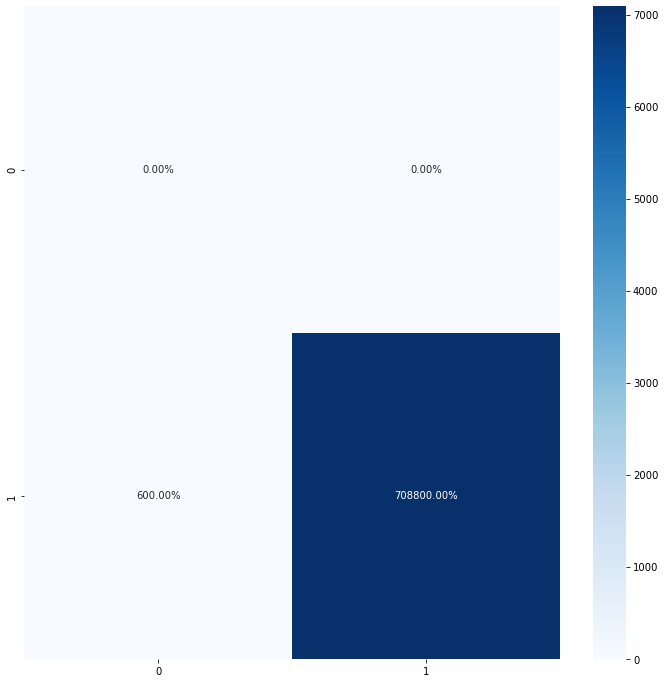

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels =predicting_fts
cm = confusion_matrix(y_pred, y_test)

# then print it in a pretty way
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')

